In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
from itertools import groupby

In [2]:
ff_tracks=pd.read_csv('ff_trs_neg.new', sep=" ", header=None, names=["Time_Step", "Longitude", "Latitude", "Intensity"])
ff_tracks.head(10)

,Time_Step,Longitude,Latitude,Intensity
0,0,NaN,NaN,NaN
1,0,0.000000,NaN,NaN
2,TRACK_NUM,NaN,NaN,NaN
3,TRACK_ID,NaN,5.000000,START_TIME
4,POINT_NUM,NaN,13.000000,NaN
5,1979031600,58.657070,0.375274,2.301285e+00
6,1979031603,60.351276,0.503040,2.190975e+00
7,1979031606,62.055439,0.569541,2.085441e+00
8,1979031609,63.765503,0.585135,2.382643e+00
9,1979031612,62.047215,0.575213,2.611984e+00


In [3]:
df = pd.read_csv('tracks.csv')
df2 = ff_tracks.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
df2.groupby((df2['Time_Step']!=df2['Time_Step'].shift()).cumsum()).max().reset_index(drop=True)
first= df2[3:7]
df2

,Time_Step,Longitude,Latitude,Intensity
0,0,0.000000,0.000000,0.000000
1,0,0.000000,0.000000,0.000000
2,0,0.000000,0.000000,0.000000
3,0,0.000000,5.000000,0.000000
4,0,0.000000,13.000000,0.000000
5,1979031600,58.657070,0.375274,2.301285
6,1979031603,60.351276,0.503040,2.190975
7,1979031606,62.055439,0.569541,2.085441
8,1979031609,63.765503,0.585135,2.382643
9,1979031612,62.047215,0.575213,2.611984


In [4]:
time_step=df2.Time_Step.values

In [5]:
#df2.sort_values(by=['Time_Step'])

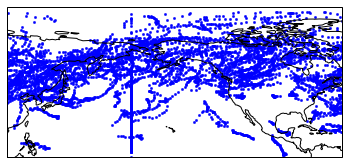

In [6]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='b',linewidth=0.5)

#plt.show()
#plt.savefig('dots')
#type(df2.Longitude)

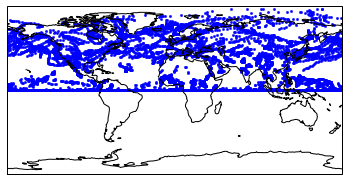

In [7]:
df2 = df.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(linewidth=1, color='k')
ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='b',linewidth=0.5)

plt.show()

In [8]:
path = 'C:/Users/asoria/Documents/AOS 801/hgt.1974.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 365)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1974-01-01 1974-01-02 ... 1974-12-31
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC Reanalysis (1974)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 95/02/06 by Hoop (netCDF2.3)\nConverted to chunke...
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [9]:
longitude = ds['lon']
latitude = ds['lat']

In [10]:
longitude_mesh, latiude_mesh = np.meshgrid(longitude,latitude)
#plt.scatter(longitude_mesh,latiude_mesh, edgecolor='black')

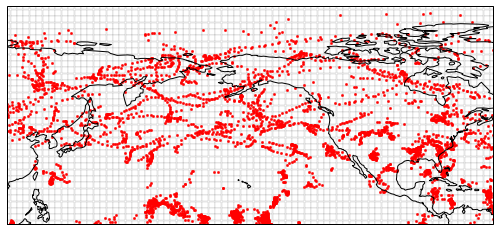

In [11]:
import cartopy.crs as ccrs
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
ax.scatter(longitude_mesh,latiude_mesh, color='white', edgecolor='black', marker='s', linewidths=0.1)
ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)
#type(df2.Longitude)

In [12]:
Lat_list = list(latiude_mesh.flatten())
Long_list = list(longitude_mesh.flatten())
counts = np.zeros(len(Lat_list))
len(Long_list)

10512

In [15]:
#time_step=df2.Time_Step.values
track_lon = df2.Longitude.values
track_lat = df2.Latitude.values
grid_lat = np.asarray(Lat_list)
grid_lon = np.asarray(Long_list)
counts_array = np.zeros((len(time_step),len(grid_lat)))
#np.size(counts_array)

In [16]:
#df2.Time_Step

In [17]:
counts_nan = counts.copy()
for i in range(len(counts_nan)):
    if counts[i]==0:
        counts_nan[i]==np.nan

In [18]:
counts_nan_2 = counts_nan.copy()
for i in range(len(counts_nan_2)):
    if counts_nan_2[i]==0:
        counts_nan_2[i]=np.nan

In [19]:
#distance formula used to find closest grid point in the mesh grid that corresponds to the ds2 lat lon
for i in range(len(time_step)):
    if time_step[i] == 0:
        grid_box_count = []
    else:
        distance = np.sqrt(((grid_lat - track_lat[i])**2) + ((grid_lon - track_lon[i])**2))
        distance_min_idx = np.where(distance==np.min(distance))[0][0]
        if distance_min_idx not in grid_box_count:
            counts_array[i,distance_min_idx] = counts_array[i,distance_min_idx]+1
            grid_box_count.append(distance_min_idx)
            

In [20]:
#counts_nan_2

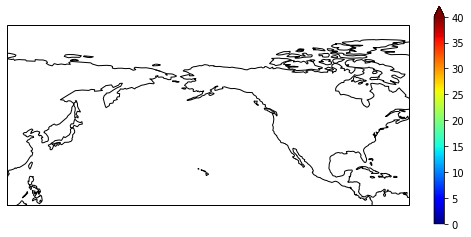

In [21]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(Long_list,Lat_list, c=counts_nan_2, marker='s', linewidths=0.1,cmap='jet',vmin=0,vmax=40)
plt.colorbar(b,extend='max');
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

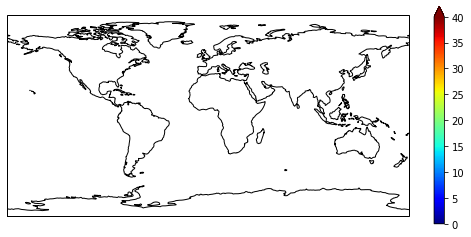

In [22]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
#ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(Long_list,Lat_list, c=counts_nan_2, marker='s', linewidths=0.1,cmap='jet',vmin=0,vmax=40)
plt.colorbar(b,extend='max');
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

In [23]:
#make new array size of time steps day instead of time step
#need to loop through all the days yyyymmdd 120 days
#need to see time steps that occur on the same day
#need 1 and 0 for every day
#counts_array(time_step,space): 1 and 0
#if daily_count[i] == time_step[i]:


#np.reshape(counts_array,(len(time_step),len(grid_lat)))
#np.ndarray(counts_array)
#np.shape(counts_array)
np.where(counts_array==1)

(array([    5,     7,     8, ..., 12502, 12503, 12504], dtype=int64),
 array([5210, 5185, 5192, ..., 5185, 4834, 4835], dtype=int64))

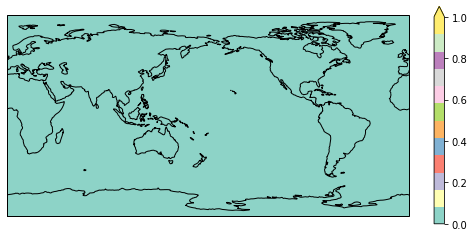

In [24]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
#ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(grid_lon,grid_lat, c=counts_array[6,:], marker='s', linewidths=0.1,cmap='Set3',vmin=0,vmax=1)
plt.colorbar(b,extend='max');
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

In [25]:
#distance formula used to find closest grid point in the mesh grid that corresponds to the ds2 lat lon
for i in range(len(unique_daily_array)):
    if daily_array[i] == 0:
        grid_box_count = []
    else:
        distance = np.sqrt(((grid_lat - track_lat[i])**2) + ((grid_lon - track_lon[i])**2))
        distance_min_idx = np.where(distance==np.min(distance))[0][0]
        if distance_min_idx not in grid_box_count:
            counts_array[i,distance_min_idx] = counts_array[i,distance_min_idx]+1
            grid_box_count.append(distance_min_idx)
            

NameError: name 'unique_daily_array' is not defined

In [26]:
np.mean(counts_array)

4.169231645522478e-05

In [27]:
#distance formula used to find closest grid point in the mesh grid that corresponds to the ds2 lat lon
for j in range(len(time_step)):
    Lat_diff_sq = []
    Long_diff_sq = []
    for i in range(len(Lat_list)):
        Lat_diff_sq.append((Lat_list[i]-track_lat[j])**2)
    for i in range(len(Long_list)):
        Long_diff_sq.append((Long_list[i]-track_lon[j])**2)
    Distance = []
    for i in range(len(Lat_diff_sq)):
         Distance.append((Lat_diff_sq[i]+Long_diff_sq[i])**(1/2))
    grid_index = Distance.index(min(Distance))
    counts[grid_index] = counts[grid_index]+1

KeyboardInterrupt: 

In [ ]:
#distance formula used to find closest grid point in the mesh grid that corresponds to the ds2 lat lon
for i in range(len(time_step)):
    if time_step[i] == 0:
        grid_box_count = []
    else:
        distance = np.sqrt(((grid_lat - track_lat[i])**2) + ((grid_lon - track_lon[i])**2))
        distance_min_idx = np.where(distance==np.min(distance))[0][0]
        if distance_min_idx not in grid_box_count:
            counts_array[i,distance_min_idx] = counts_array[i,distance_min_idx]+1
            grid_box_count.append(distance_min_idx)

In [28]:
#loop through all the time steps for all lat and lon
#loop through 7 time steps and have a map for every time step
#matrix = time, lat, lon
#need counts/day
#time array = year.month.day so we can loop through only days
cyclone_flag = []
for i in range(len(counts)):
    if counts[i] == 0:
        cyclone_flag.append(0)
    else:
        cyclone_flag.append(1)

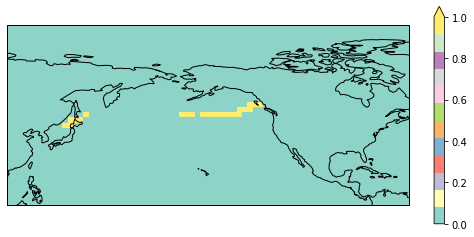

In [29]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(Long_list,Lat_list, c=cyclone_flag, marker='s', linewidths=0.1,cmap='Set3')
plt.colorbar(b,extend='max');
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

In [30]:
num=str(time_step[5])
num[0:8]

'19790316'

In [31]:
num2= []
for i in range(len(time_step)):
    num2.append(str(time_step[i]))
num2[0:12]

['0',
 '0',
 '0',
 '0',
 '0',
 '1979031600',
 '1979031603',
 '1979031606',
 '1979031609',
 '1979031612',
 '1979031615',
 '1979031618']

In [32]:
daily_time=[]
for i in range(len(num2)):
    if len(num2[i]) == 1:
        daily_time.append(num2[i])
    else:
        daily_time.append(num2[i][0:8])
len(daily_time)

12506

In [33]:
daily_num = []
for i in range(len(daily_time)):
    daily_num.append(int(daily_time[i]))

In [34]:
daily_array = np.asarray(daily_num)
unique_daily_array=np.unique(daily_array)

In [36]:
#unique_daily_array

In [37]:
#turn unique daily values into strings
unique_daily_string= []
for i in range(len(unique_daily_array)):
    unique_daily_string.append(str(unique_daily_array[i]))
#unique_daily_string

In [38]:
#sum up all the hourly data to match its day 
counts = 0
match=[]
for i in range(len(unique_daily_string)):
    for j in range(len(num2)):
        if num2[j][:8]==unique_daily_string[i]:
            counts +=1
    match.append(counts)
    counts = 0

In [39]:
#turn the sums and their days into an array
daily_counts_array = np.zeros((len(match),2))
daily_counts_array[:,0] = unique_daily_array
daily_counts_array[:,1] = match
np.set_printoptions(suppress=True)
#daily_counts_array

In [40]:
num3=[]
for i in range(len(num2)):
    if len(num2[i])==1:
        num3.append(float(num2[i]))
    else:
        num3.append(float(num2[i][:8]))
#num3

In [41]:
#sum up all the indicies of the hourly data to match its day
counts = 0
match = []
for i in range(len(unique_daily_array)):
    #for j in range(len(num2)):
    daily_ind= np.where(num3[:][:8]==unique_daily_array[i])
            #counts +=1
    #match.append(counts)
    #counts = 0

In [42]:
#each time i changes it overwrites the previous data so how do I put it in the count array?? and why do we want it in count array?
i=1
daily_ind= np.where(num3==unique_daily_array[i])
daily_ind
#need to match these indicies with their grid box (mesh grid for loop)
#sum all counts in each grid box
#can plot 3/1 that shows 48 different grid box, some may have 5 in one box
#lat lon map that shows counts in each grid box
#will need to loop through all the days (i) and save the info time,lat,lon 

(array([ 20,  21,  22,  23,  24,  25,  26,  27, 103, 104, 105, 106, 107,
        108, 109, 110, 124, 125, 126, 127, 128, 129, 130, 131, 168, 169,
        170, 171, 172, 173, 174, 175, 200, 201, 202, 203, 204, 205, 206,
        207, 270, 271, 272, 273, 274, 275, 276, 317], dtype=int64),)

In [43]:
len(daily_ind[0])

48

In [44]:
df2.iloc[20:27,:]

,Time Step,Longitude,Latitude,Intensity
20,119,60.337376,0.432876,1.61
21,120,62.038349,0.507185,1.95
22,121,60.330864,0.447913,2.11
23,122,62.046688,0.497230,1.82
24,123,60.323872,0.441928,2.11
25,124,62.027405,0.505719,2.04
26,125,63.746964,0.510666,1.78


In [ ]:
#distance formula used to find closest grid point in the mesh grid that corresponds to the ds2 lat lon
for i in range(len(daily_ind)):
    distance = np.sqrt(((grid_lat - track_lat[i])**2) + ((grid_lon - track_lon[i])**2))
    distance_min_idx = np.where(distance==np.min(distance))[0][0]
    if distance_min_idx not in grid_box_count:
        counts_array[i,distance_min_idx] = counts_array[i,distance_min_idx]+1
        grid_box_count.append(distance_min_idx)

In [ ]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
#ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(grid_lon,grid_lat, c=counts_nan_2, marker='s', linewidths=0.1,cmap='Set3',vmin=0,vmax=1)
plt.colorbar(b,extend='max');
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

In [ ]:
time_step

In [ ]:
daily_ind

In [ ]:
#flatten lat and lon mesh grid arrays into vectors
#make a vector that is the same length as the flattened lat and lon that's filled with zeros
#for loops will loop through the points then 

In [ ]:
count = df2.groupby(['Time Step']).count() 
count

In [ ]:
df2['Time_Step'] = df2['Time_Step'].astype(str)

In [ ]:
df3 =df2.copy()
df3 = df3[df3.Time_Step !='0']
df3
df3['Date']=pd.to_datetime(df3['Time_Step'], format='%Y%m%d%H')
df3.set_index('Date').groupby(pd.Grouper(freq='D')).mean()

In [ ]:
#name the dims.. lat lon time
#count = 0
#loop through lat and lon
#loop through years

f = open('tr_trs_neg', 'r')
type(f)
#print(f.read())

In [ ]:
with open('tr_trs_neg', 'r') as f:
    lines = f.readlines()
if str == float:
    x = [float(line.split()[0]) for line in lines]
    y = [float(line.split()[1]) for line in lines]
#plt.plot(x ,y)
#plt.show()